In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
from datetime import datetime

import sklearn as sk 
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import json

In [4]:
combined_df = pd.read_csv("../data/ingested.csv")
display(combined_df.head())

Unnamed: 0                                        hot_100_url      WeekID  \
0           0  http://www.billboard.com/charts/hot-100/1990-0...  1990-09-29   
1           1  http://www.billboard.com/charts/hot-100/1991-0...  1991-09-07   
2           2  http://www.billboard.com/charts/hot-100/1975-0...  1975-04-26   
3           3  http://www.billboard.com/charts/hot-100/1965-0...  1965-07-31   
4           4  http://www.billboard.com/charts/hot-100/1987-0...  1987-05-09   

   Week Positon                                               Song  \
0             1       (Can't Live Without Your) Love And Affection   
1             1                  (Everything I Do) I Do It For You   
2             1  (Hey Won't You Play) Another Somebody Done Som...   
3             1                      (I Can't Get No) Satisfaction   
4             1                         (I Just) Died In Your Arms   

            Performer                                             SongID  \
0              Nelson  (Can't Live Without Your) Love And AffectionNe...   
1         Bryan Adams       (Everything I Do) I Do It For YouBryan Adams   
2         B.J. Thomas  (Hey Won't You Play) Another Somebody Done Som...   
3  The Rolling Stones    (I Can't Get No) SatisfactionThe Rolling Stones   
4        Cutting Crew             (I Just) Died In Your ArmsCutting Crew   

   Instance  Previous Week Position  Peak Position  ...  Loudness (db) Mode  \
0         1                     4.0              1  ...         -6.344  1.0   
1         1                     1.0              1  ...        -12.635  1.0   
2         1                     2.0              1  ...        -11.287  1.0   
3         1                     1.0              1  ...         -7.842  1.0   
4         1                     1.0              1  ...        -11.209  0.0   

  Speechiness Acousticness  Instrumentalness  Liveness Valence    Tempo  \
0      0.0393       0.0354          0.000000    0.0609   0.855  121.419   
1      0.0284       0.0816          0.000047    0.0652   0.298  131.227   
2      0.0328       0.7440          0.000000    0.1140   0.702  124.806   
3      0.0353       0.0348          0.127000    0.1960   0.904  136.282   
4      0.0438       0.0119          0.000076    0.0678   0.499  124.919   

   Time Signature  Popularity  
0             4.0        47.0  
1             4.0        65.0  
2             4.0        40.0  
3             4.0        78.0  
4             4.0        70.0  

[5 rows x 30 columns]

## K-Means Clustering

In [5]:
# de-duplicate (in case it wasn't before)
de_dup = combined_df.sort_values(by = "WeekID",ascending=True).drop_duplicates(subset = ['SongID'])
de_dup = de_dup.dropna(subset=['Genres'])
names_df = de_dup[["WeekID", "Song", "Performer"]]

features = ['Duration (ms)', 'Explicit',
       'Danceability', 'Energy', 'Key', 'Loudness (db)', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Time Signature']

In [6]:
X = de_dup[features]

y_name = "pca2"
x_name = "pca1"
upper_cluster = 15

scaler = StandardScaler()
scaler.fit(de_dup[features])
X_scaled = scaler.transform(de_dup[features])

my_cmap = mpl.colormaps['tab20']

pca2 = PCA(n_components = 2).fit(X_scaled).transform(X_scaled)
pca2_df = pd.DataFrame(pca2, columns = [x_name, y_name])


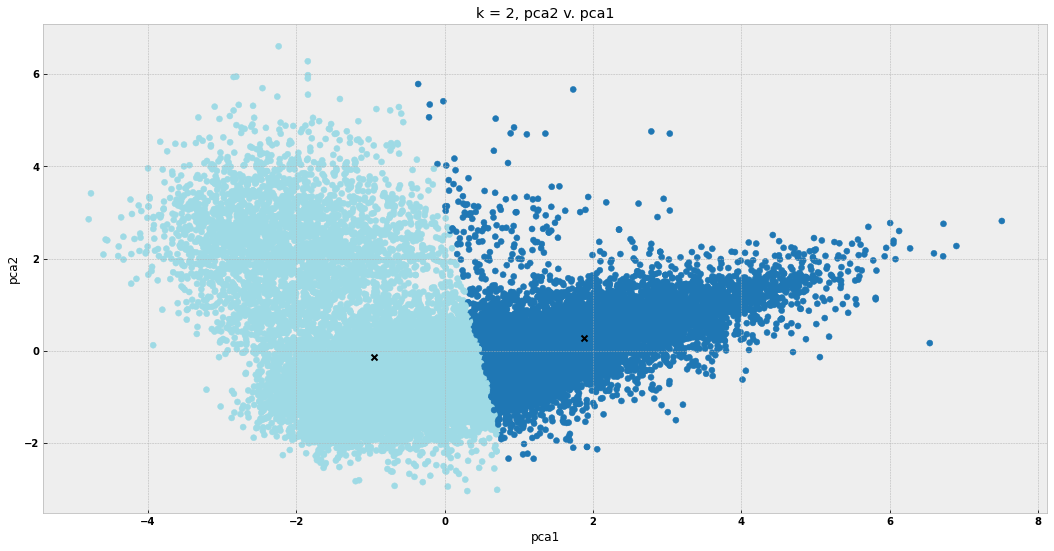

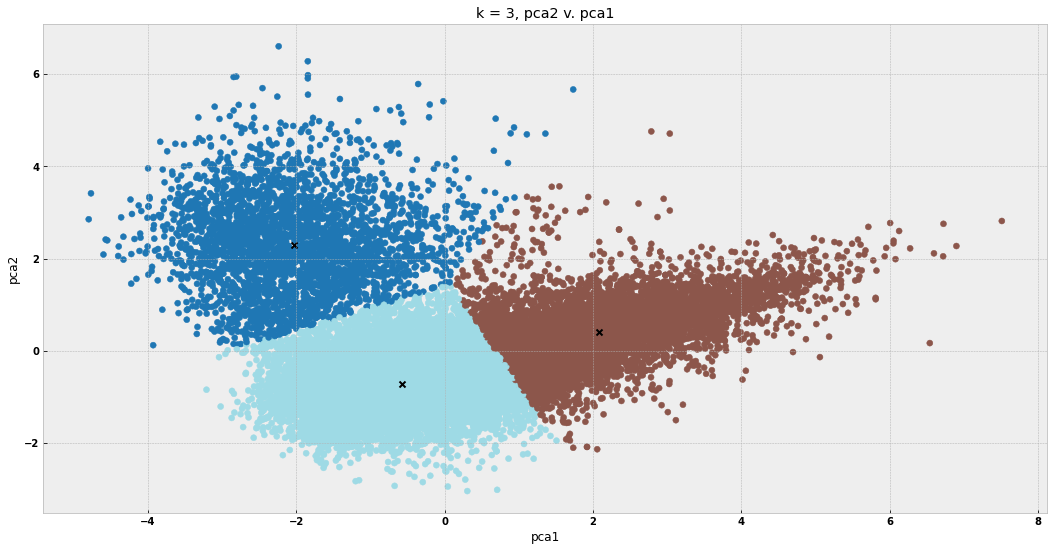

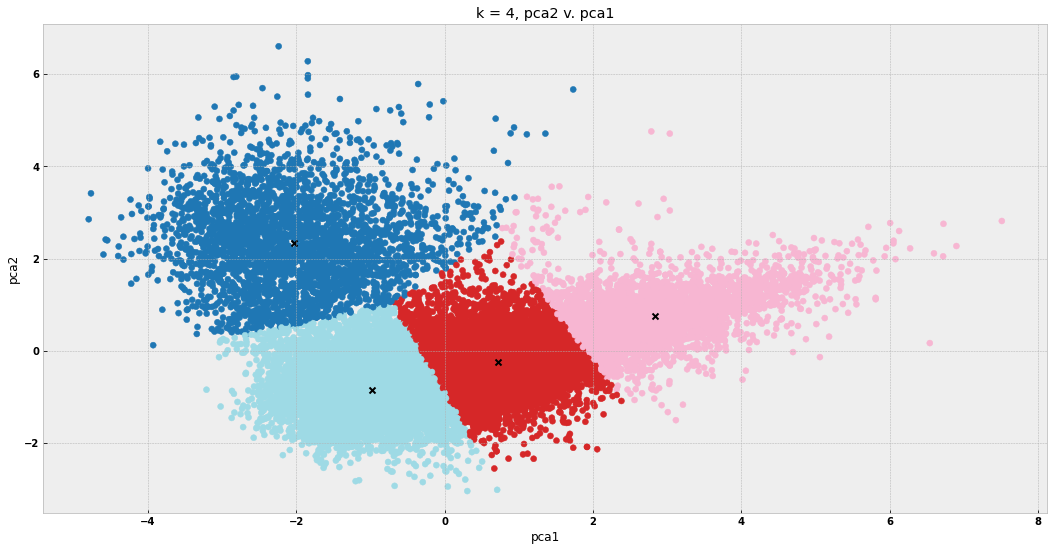

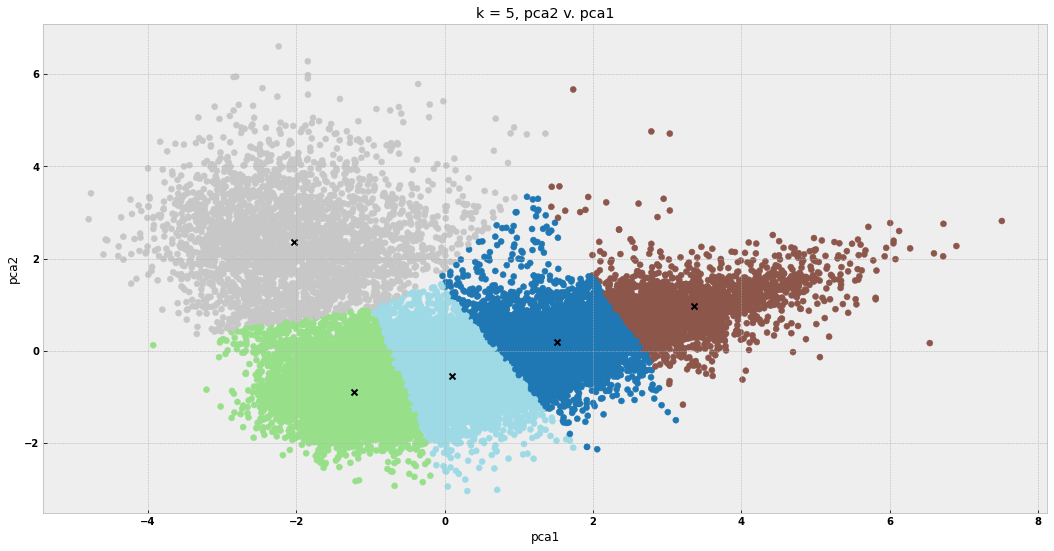

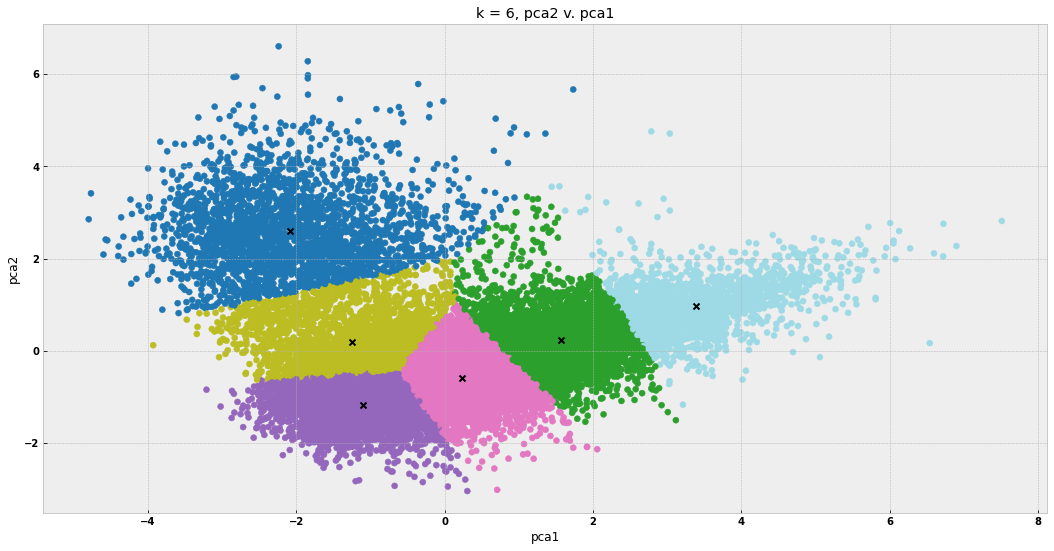

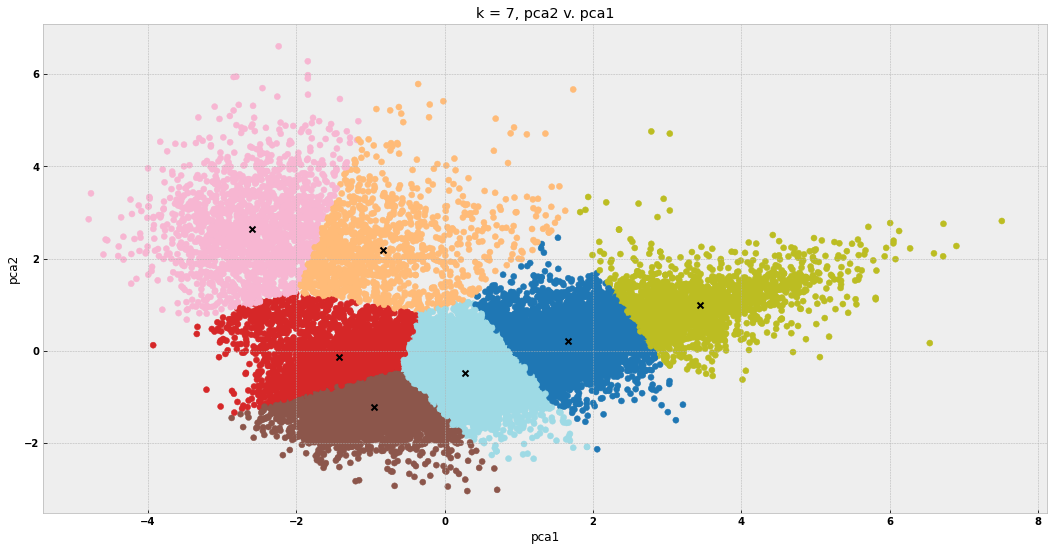

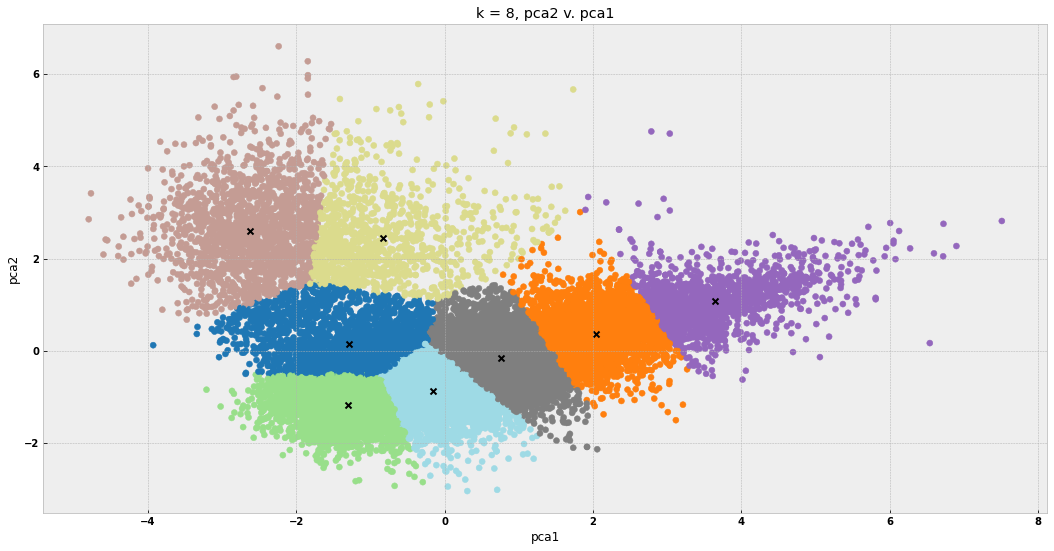

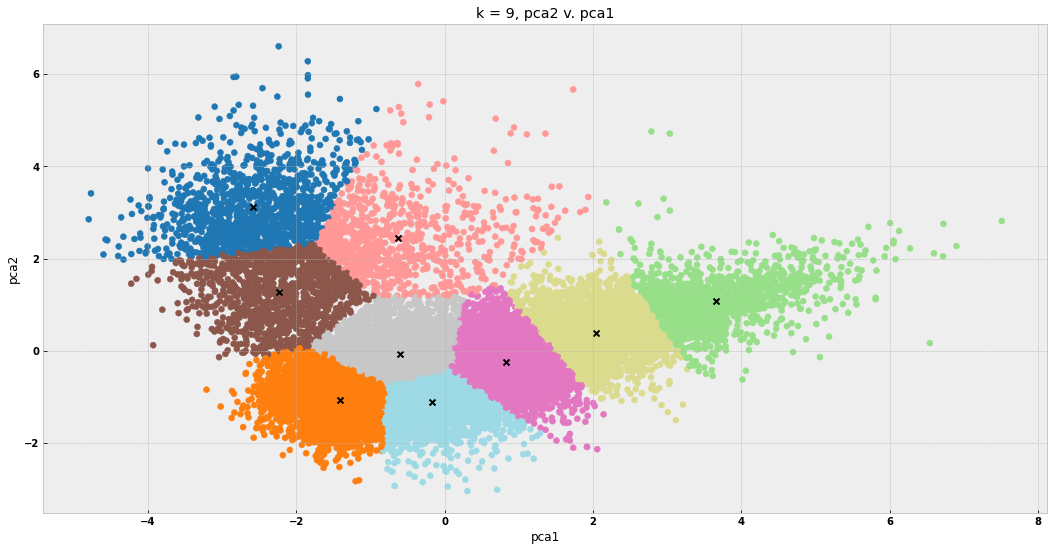

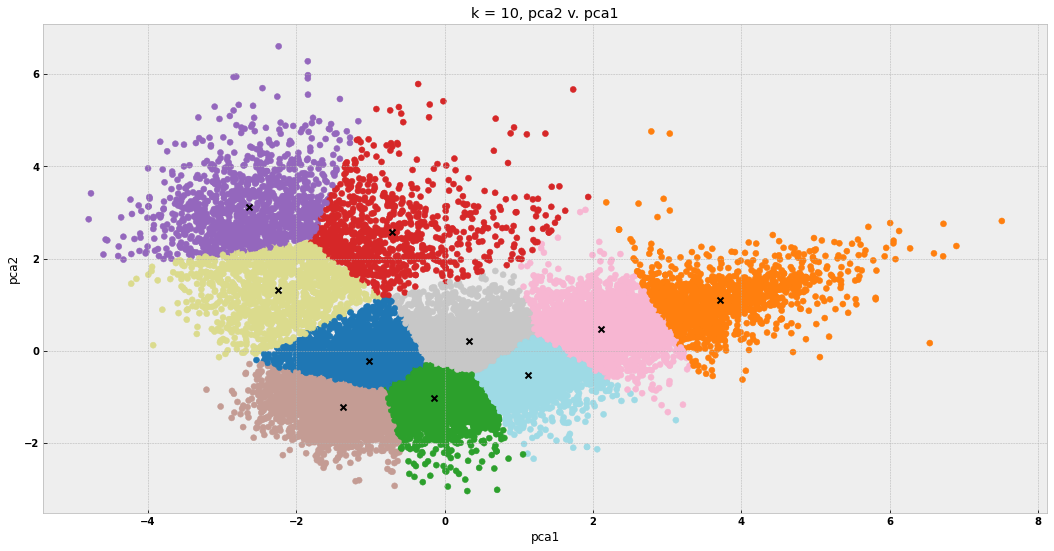

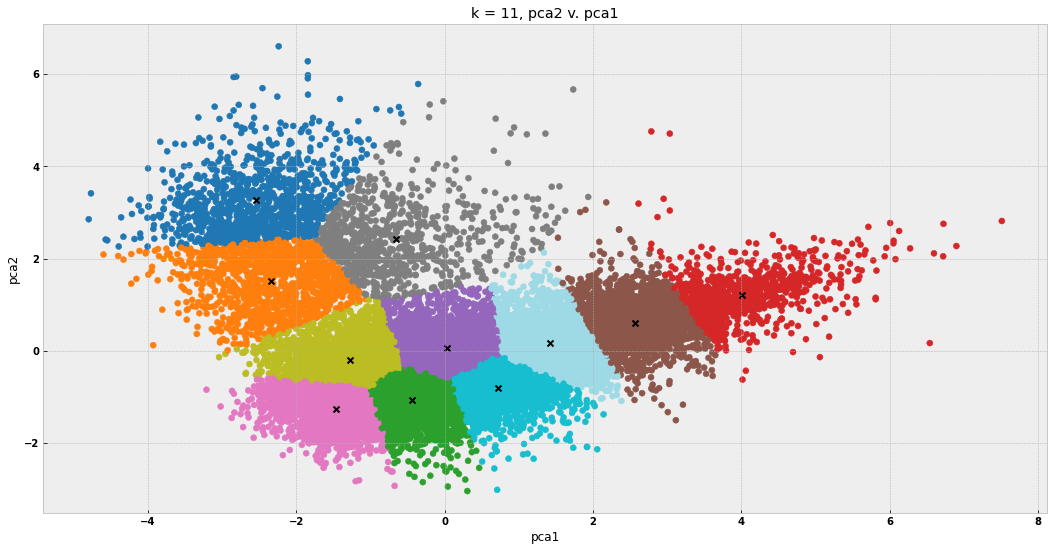

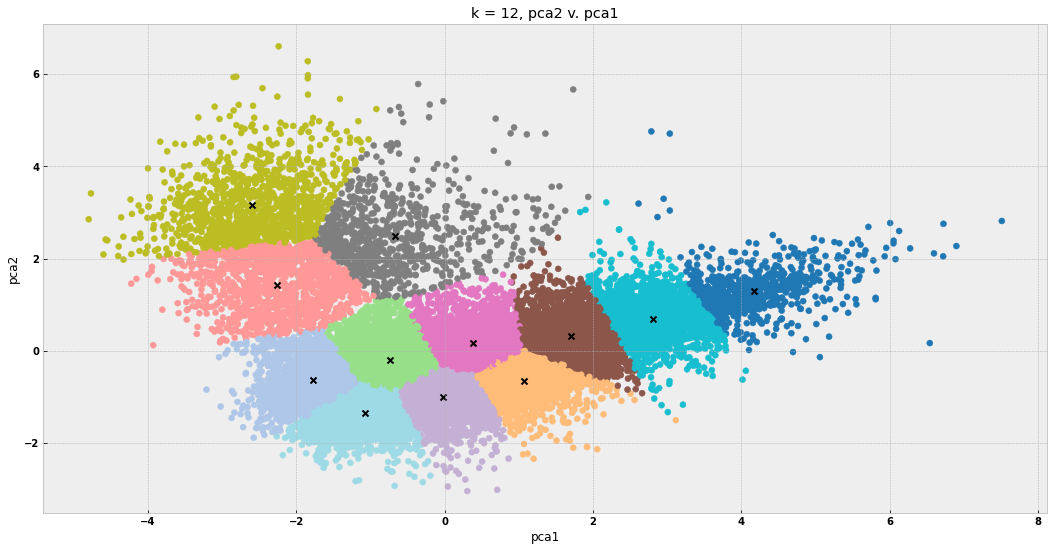

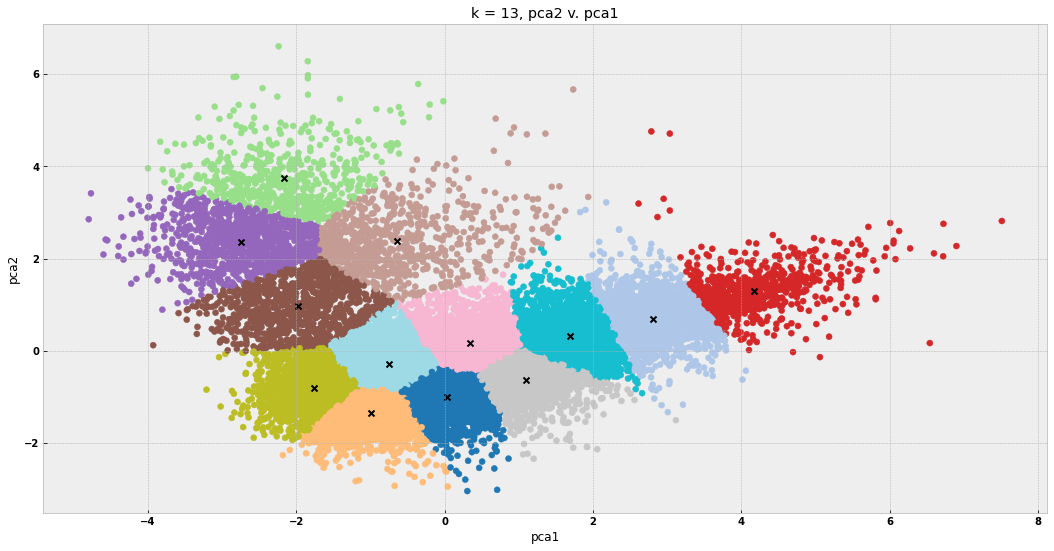

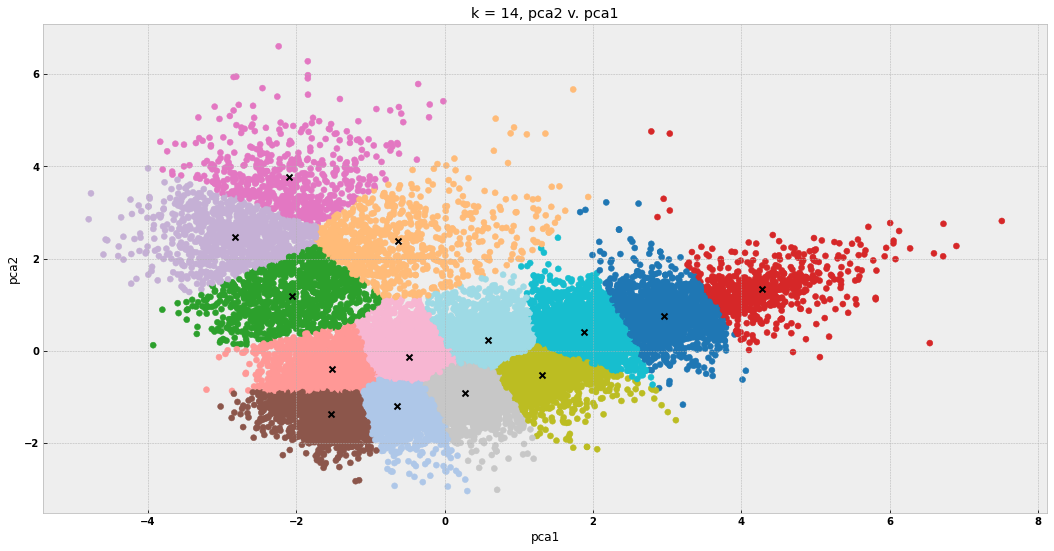

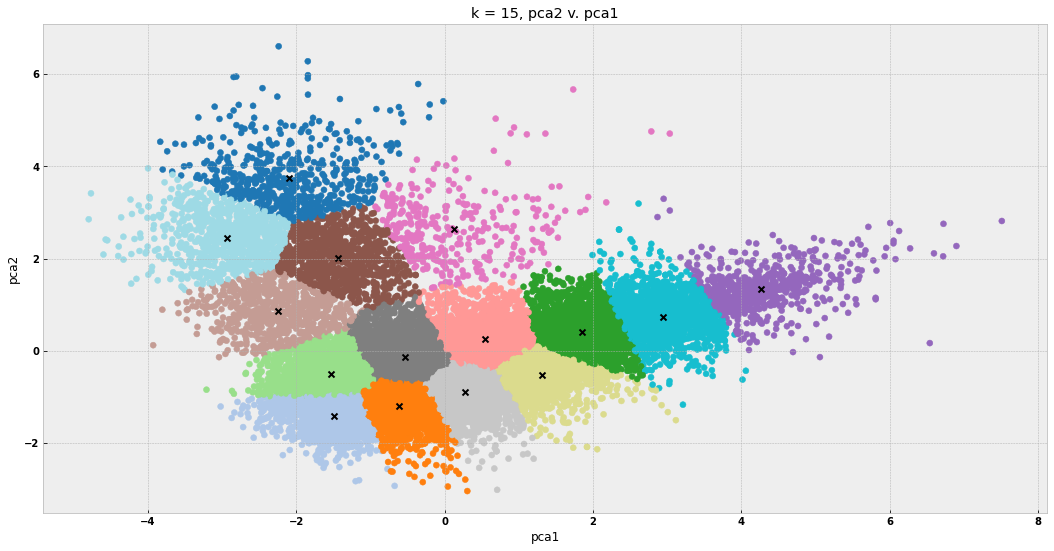

In [42]:
# Initial clustering

using_df = pca2_df

for k in range(2,upper_cluster + 1):

    # fit and train
    model = KMeans(k, init="random", n_init=20)
    model.fit(using_df)
    class_predict = model.predict(using_df)

    # plot
    plt.scatter(using_df[x_name], using_df[y_name], c=class_predict, cmap=my_cmap)
    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="black", marker="x")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(f"k = {k}, {y_name} v. {x_name}")
    plt.show()

In [43]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (18, 9)

font = {'family': 'sans-serif', 
        'style': 'normal', 
        'weight': 'bold', 
        'size': 10}
plt.rc('font', **font)

spot_green = "#1db954"
spot_white = "#ffffff"
spot_black = "#191414"

## Scoring

### Framework Code

In [44]:
def silhouette_scoring(filename, lower_cluster, upper_cluster, X, folder_name):

    with open(f"../data/kmeans/scaled/{filename}.txt", "w") as f: 

        silhouette_scores = []
        for k in range(lower_cluster, upper_cluster + 1):
            print(f"Starting k = {k}")
            model = KMeans(k)
            model.fit(X)
            predictions = model.predict(X)

            score = silhouette_score(X, predictions)

            silhouette_scores.append(score)

            statement = f"Silhouette Score for {k}: {score}"
            f.write(statement + "\n")
            print(statement)

        plt.plot(np.arange(lower_cluster, upper_cluster + 1), silhouette_scores)
        plt.xlabel('K')
        plt.xticks(ticks=[x for x in range(lower_cluster,upper_cluster + 1)], labels=[x for x in range(lower_cluster,upper_cluster + 1)])
        plt.ylabel("Silhouette Score")
        plt.title(f"Silhouette Score v. K, {filename}")
        plt.show()
        plt.savefig(f"../data/kmeans/{folder_name}/images/{filename}.eps", format = "eps")
    
    return silhouette_scores
            

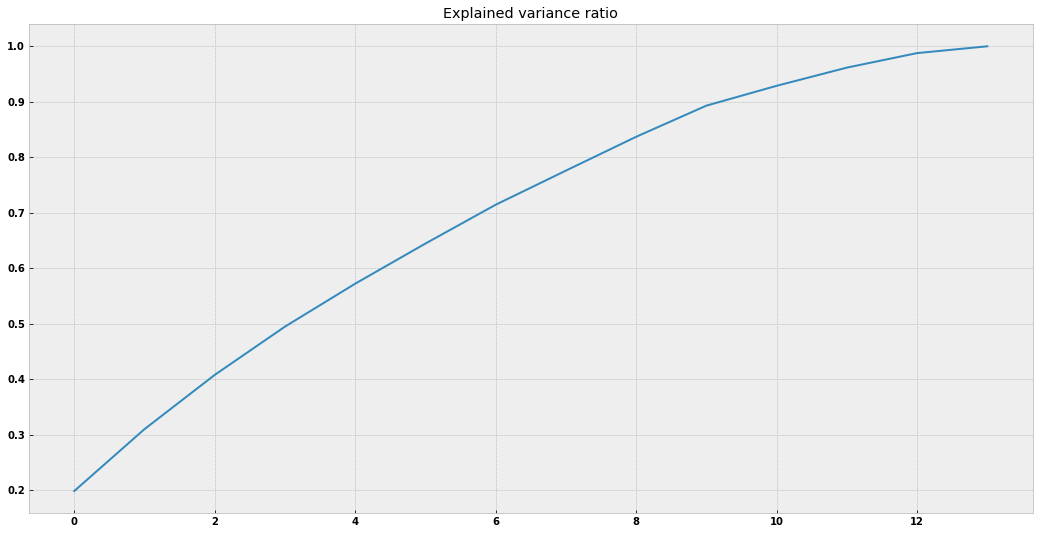

[0.19813517 0.30976385 0.40752723 0.49457854 0.57200927 0.64438405
 0.71432833 0.77584369 0.83685067 0.89300829 0.92874713 0.96154121
 0.98773462 1.        ]


In [45]:
## Explained Variance

general_pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(general_pca.explained_variance_ratio_))
plt.title("Explained variance ratio")
plt.show()

print(np.cumsum(general_pca.explained_variance_ratio_))

### Scoring Code

In [46]:
columns_list = ["k" + str(x) for x in range(2, 21)]

scores_df = pd.DataFrame(columns=["name"] + columns_list)

Starting k = 2
Silhouette Score for 2: 0.14525756702212236
Starting k = 3
Silhouette Score for 3: 0.16932888126090911
Starting k = 4
Silhouette Score for 4: 0.1770661038689421
Starting k = 5
Silhouette Score for 5: 0.14323435645540813
Starting k = 6
Silhouette Score for 6: 0.12142638834467501
Starting k = 7
Silhouette Score for 7: 0.12322321522647074
Starting k = 8
Silhouette Score for 8: 0.1318231542077334
Starting k = 9
Silhouette Score for 9: 0.12311731270993134
Starting k = 10
Silhouette Score for 10: 0.1229693348921428
Starting k = 11
Silhouette Score for 11: 0.11757516562045532
Starting k = 12
Silhouette Score for 12: 0.11724893440632846
Starting k = 13
Silhouette Score for 13: 0.10815415134768468
Starting k = 14
Silhouette Score for 14: 0.10875285393923051
Starting k = 15
Silhouette Score for 15: 0.10624409904349892
Starting k = 16
Silhouette Score for 16: 0.10968020960024678
Starting k = 17
Silhouette Score for 17: 0.10215752103655355
Starting k = 18
Silhouette Score for 18: 0.

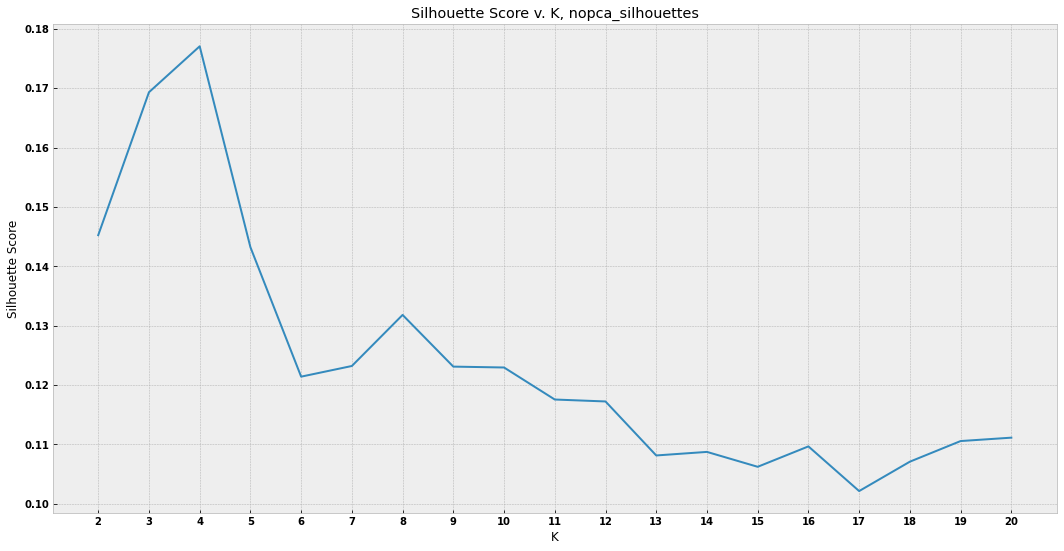

<Figure size 1296x648 with 0 Axes>

In [48]:
# NON-PCA 
nopca_scores = silhouette_scoring("nopca_silhouettes", 2, 20, X_scaled, "scaled")

In [49]:
scores_df.loc[len(scores_df)] = ["pca_none"] + nopca_scores

Starting n_components = 2
Starting k = 2
Silhouette Score for 2: 0.4163055163617591
Starting k = 3
Silhouette Score for 3: 0.5031341601912163
Starting k = 4
Silhouette Score for 4: 0.42683162361149846
Starting k = 5
Silhouette Score for 5: 0.37777105186904814
Starting k = 6
Silhouette Score for 6: 0.3612947943600681
Starting k = 7
Silhouette Score for 7: 0.3527247490583004
Starting k = 8
Silhouette Score for 8: 0.3333286868569171
Starting k = 9
Silhouette Score for 9: 0.3429227054149931
Starting k = 10
Silhouette Score for 10: 0.34002073228469665
Starting k = 11
Silhouette Score for 11: 0.3289340392881314
Starting k = 12
Silhouette Score for 12: 0.3258932162687101
Starting k = 13
Silhouette Score for 13: 0.32620805684044224
Starting k = 14
Silhouette Score for 14: 0.3229216483441243
Starting k = 15
Silhouette Score for 15: 0.32443413002711524
Starting k = 16
Silhouette Score for 16: 0.3290350942016569
Starting k = 17
Silhouette Score for 17: 0.3275810244159071
Starting k = 18
Silhouett

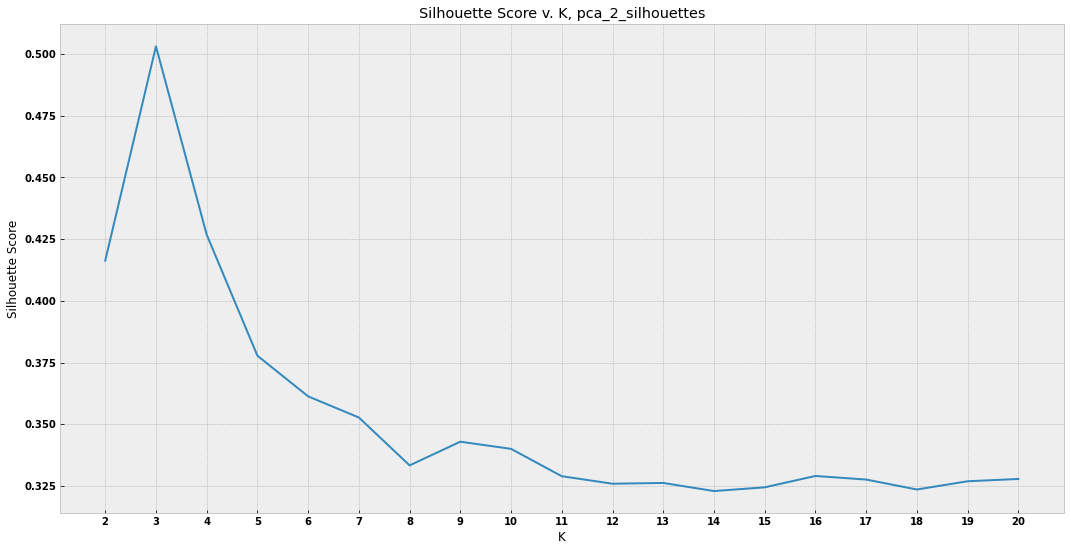


Starting n_components = 3
Starting k = 2
Silhouette Score for 2: 0.3149420949729944
Starting k = 3
Silhouette Score for 3: 0.37036532847466885
Starting k = 4
Silhouette Score for 4: 0.3133552700905341
Starting k = 5
Silhouette Score for 5: 0.2909262513181541
Starting k = 6
Silhouette Score for 6: 0.2822212213766136
Starting k = 7
Silhouette Score for 7: 0.2709532382311238
Starting k = 8
Silhouette Score for 8: 0.269063064081727
Starting k = 9
Silhouette Score for 9: 0.25302531113012344
Starting k = 10
Silhouette Score for 10: 0.2430520114374653
Starting k = 11
Silhouette Score for 11: 0.24318145941575367
Starting k = 12
Silhouette Score for 12: 0.24259484199913106
Starting k = 13
Silhouette Score for 13: 0.239360971219824
Starting k = 14
Silhouette Score for 14: 0.2383669263677444
Starting k = 15
Silhouette Score for 15: 0.23817116143039707
Starting k = 16
Silhouette Score for 16: 0.23831455596658843
Starting k = 17
Silhouette Score for 17: 0.23379379993871724
Starting k = 18
Silhouet

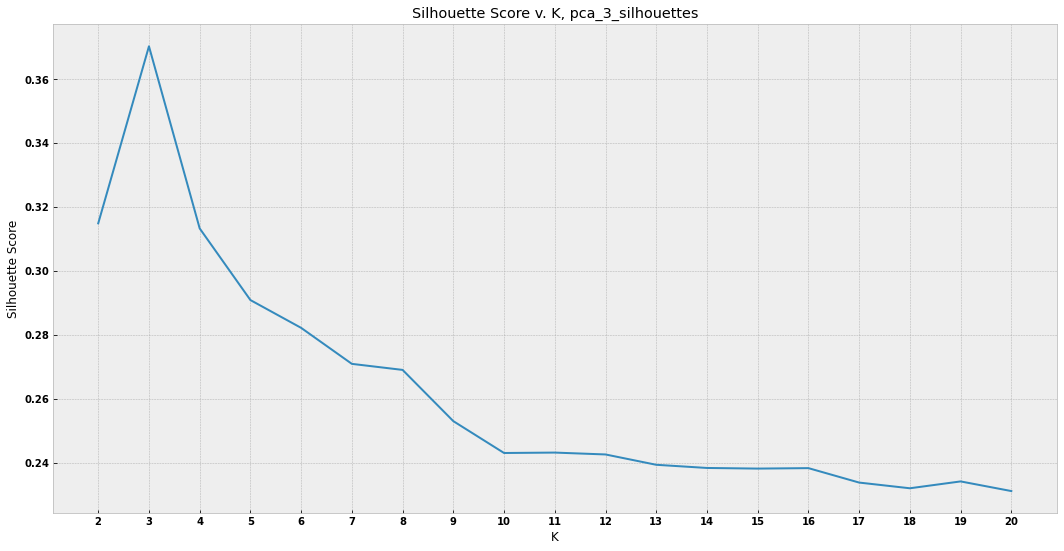


Starting n_components = 4
Starting k = 2
Silhouette Score for 2: 0.26492498848478324
Starting k = 3
Silhouette Score for 3: 0.31348776232171455
Starting k = 4
Silhouette Score for 4: 0.25256682679471254
Starting k = 5
Silhouette Score for 5: 0.24846732521949677
Starting k = 6
Silhouette Score for 6: 0.24605300847728767
Starting k = 7
Silhouette Score for 7: 0.23777852911905373
Starting k = 8
Silhouette Score for 8: 0.22732009090590194
Starting k = 9
Silhouette Score for 9: 0.22287163850803926
Starting k = 10
Silhouette Score for 10: 0.20649217783572735
Starting k = 11
Silhouette Score for 11: 0.20363492313105794
Starting k = 12
Silhouette Score for 12: 0.20306262445920473
Starting k = 13
Silhouette Score for 13: 0.20317524426448919
Starting k = 14
Silhouette Score for 14: 0.20145134996027733
Starting k = 15
Silhouette Score for 15: 0.19768955028009152
Starting k = 16
Silhouette Score for 16: 0.19608187409410582
Starting k = 17
Silhouette Score for 17: 0.1988430023462356
Starting k = 1

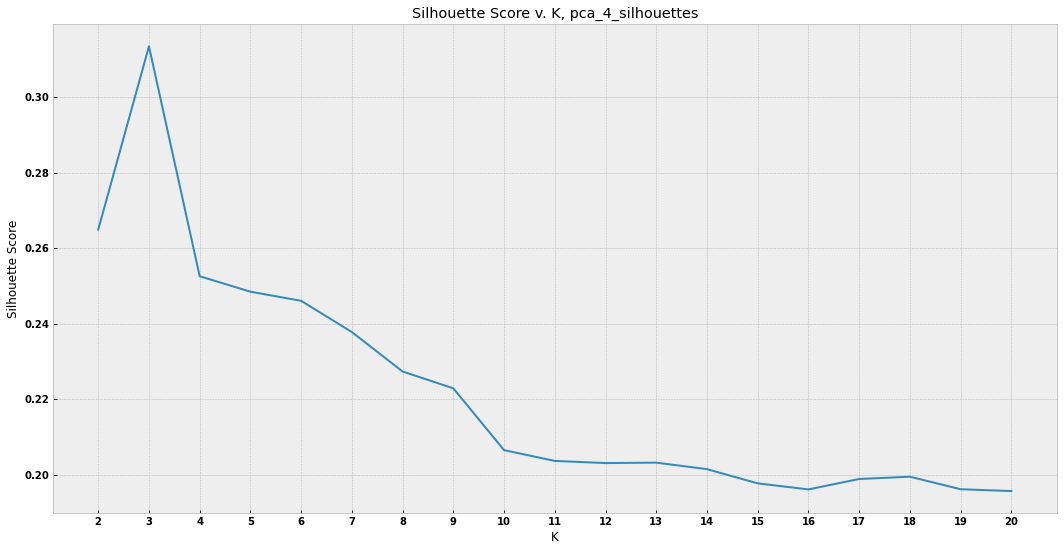

<Figure size 1296x648 with 0 Axes>

In [51]:
# PCA Optimal

for i in range(2, 5):
    print(f"Starting n_components = {i}")

    loop_pca = PCA(n_components = i).fit(X_scaled).transform(X_scaled)

    pca_scores = silhouette_scoring(f"pca_{i}_silhouettes", 2, 20, loop_pca, "scaled")
    scores_df.loc[len(scores_df)] = [f"pca_{i}"] + pca_scores
    
    print("=========================\n")

name        k2        k3        k4        k5        k6        k7  \
0  pca_none  0.145258  0.169329  0.177066  0.143234  0.121426  0.123223   
1     pca_2  0.416306  0.503134  0.426832  0.377771  0.361295  0.352725   
2     pca_3  0.314942  0.370365  0.313355  0.290926  0.282221  0.270953   
3     pca_4  0.264925  0.313488  0.252567  0.248467  0.246053  0.237779   

         k8        k9       k10       k11       k12       k13       k14  \
0  0.131823  0.123117  0.122969  0.117575  0.117249  0.108154  0.108753   
1  0.333329  0.342923  0.340021  0.328934  0.325893  0.326208  0.322922   
2  0.269063  0.253025  0.243052  0.243181  0.242595  0.239361  0.238367   
3  0.227320  0.222872  0.206492  0.203635  0.203063  0.203175  0.201451   

        k15       k16       k17       k18       k19       k20  
0  0.106244  0.109680  0.102158  0.107107  0.110579  0.111152  
1  0.324434  0.329035  0.327581  0.323560  0.326890  0.327828  
2  0.238171  0.238315  0.233794  0.232010  0.234155  0.231136  
3  0.197690  0.196082  0.198843  0.199451  0.196130  0.195645

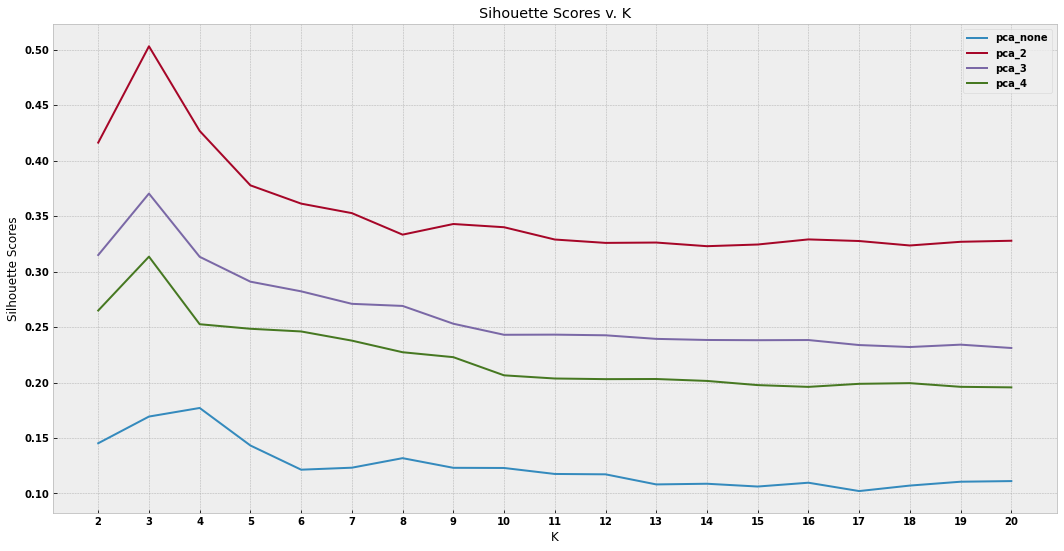

In [70]:
display(scores_df)

for i in range(len(scores_df)):

    name = scores_df.iloc[i]["name"]
    
    name_scores = scores_df.loc[scores_df["name"] == name].values.flatten().tolist()
    
    plt.plot([x for x in range(2,21)], name_scores[1:])

plt.ylabel("Silhouette Scores")
plt.xlabel("K")
plt.xticks(ticks=[x for x in range(2,21)], labels=[x for x in range(2,21)])
plt.title("Sihouette Scores v. K")
plt.legend(scores_df["name"])

folder_name = input("Where should this be saved? >")

plt.savefig(f"../data/kmeans/{folder_name}/images/silhouette_scores.eps", format = "eps")
scores_df.to_csv(f"../data/kmeans/{folder_name}/silhouette_scores.csv")

plt.show()


## Genre analysis

### Framework Code

In [8]:
def get_raw_genres(df, predicted):

    if predicted == -1:
        raw_list = [x for x in df['Genres']]
        print(f"In class {predicted}: {len(df['Genres'])}")
    else:
        raw_list = [x for x in df['Genres'].loc[df['Predictions'] == predicted]]
        print(f"In class {predicted}: {len(df['Genres'].loc[df['Predictions'] == predicted])}")
    
    parsed_list = []

    for entry in raw_list: 
        if entry != "[]":
            stripped = entry[1:-1]
            stripped = stripped.replace("'", '').replace('"', '')
            split = stripped.split(", ")
            parsed_list = parsed_list + split
    
    return parsed_list

In [9]:
def parse_genres(parsed_list, master_list, group_name, n=10):

    master_list.sort()

    count_dict = {key:parsed_list.count(key) for key in master_list}

    count_df = pd.DataFrame.from_dict(count_dict, orient='index')
    count_df = count_df.reset_index(level=0)
    count_df = count_df.rename(columns={0: "Count", "index":"Genre"})

    top_df = count_df.nlargest(n, 'Count')

    fig = plt.figure(1, [20,8])

    ax = fig.add_subplot(111)
    ax.set_title(f"Group {group_name}")
    ax.set_xlabel(f"Genre")
    ax.set_ylabel(f"Prevalence")
    rects = ax.bar(top_df['Genre'], top_df['Count'], color=spot_green)
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.show()

    return

In [10]:
# fit and train
pca2 = PCA(n_components=2).fit(X_scaled).transform(X_scaled)
pca_2_df = pd.DataFrame(pca2, columns=[x_name, y_name])

k = 10
model = KMeans(k)
model.fit(pca_2_df)
predictions = model.predict(pca_2_df)

# add predictions to df
new_df = de_dup
new_df['Predictions'] = predictions.tolist()
new_df = new_df.dropna(subset=['Genres'])
new_df[['WeekID', 'Song', 'Performer']] = names_df

# create cluster list
cluster_list = []
master = get_raw_genres(new_df, -1)

for i in range(0, k):
    cluster_list.append(get_raw_genres(new_df, i))

In class -1: 24029
In class 0: 3020
In class 1: 2854
In class 2: 848
In class 3: 3738
In class 4: 1285
In class 5: 2605
In class 6: 1419
In class 7: 4280
In class 8: 2807
In class 9: 1173


In [11]:
print(cluster_list)

[['album rock', 'classic rock', 'folk rock', 'mellow gold', 'piano rock', 'rock', 'singer-songwriter', 'soft rock', 'adult standards', 'brill building pop', 'easy listening', 'lounge', 'motown', 'rock-and-roll', 'rockabilly', 'soul', 'swing', 'vocal jazz', 'brill building pop', 'bubblegum pop', 'doo-wop', 'motown', 'rhythm and blues', 'rock-and-roll', 'rockabilly', 'soul', 'adult standards', 'brill building pop', 'bubblegum pop', 'doo-wop', 'rock-and-roll', 'rockabilly', 'canadian blues', 'rock-and-roll', 'rockabilly', 'adult standards', 'brill building pop', 'classic girl group', 'doo-wop', 'rock-and-roll', 'vocal harmony group', 'comic', 'novelty', 'adult standards', 'brill building pop', 'easy listening', 'lounge', 'motown', 'rock-and-roll', 'rockabilly', 'soul', 'swing', 'vocal jazz', 'motown', 'rhythm and blues', 'louisiana blues', 'new orleans blues', 'rhythm and blues', 'adult standards', 'classic soul', 'jazz blues', 'piano blues', 'soul', 'soul blues', 'vocal jazz', 'adult sta

In [81]:
number_of_clusters = input("How many clusters? > ")

new_df.to_csv(f"../data/kmeans/scaled/{number_of_clusters}clusters.csv")

## Bar Graphs

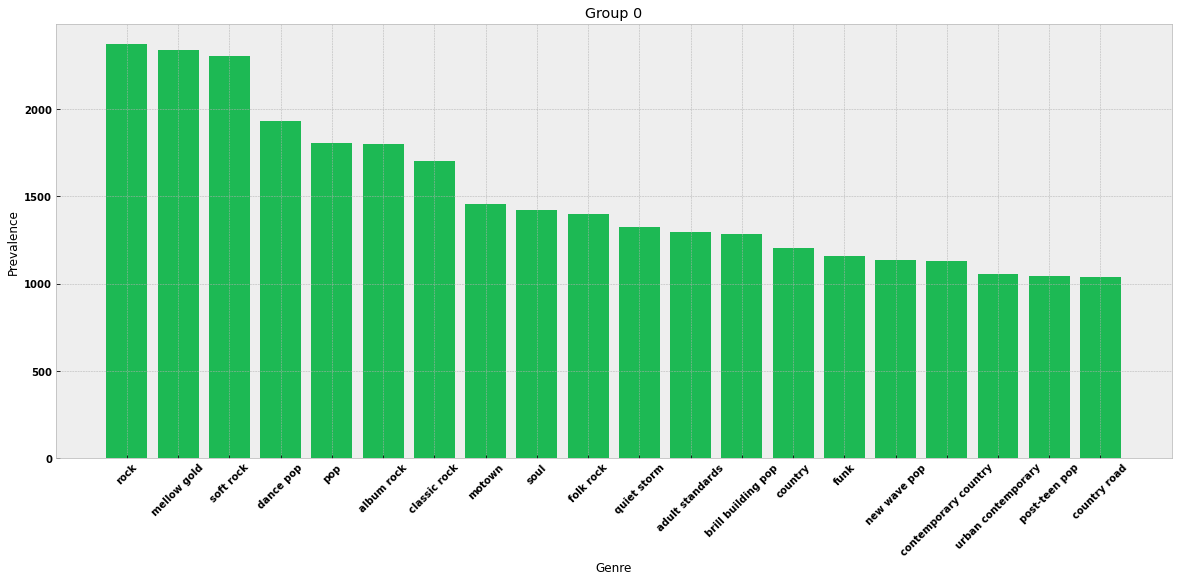

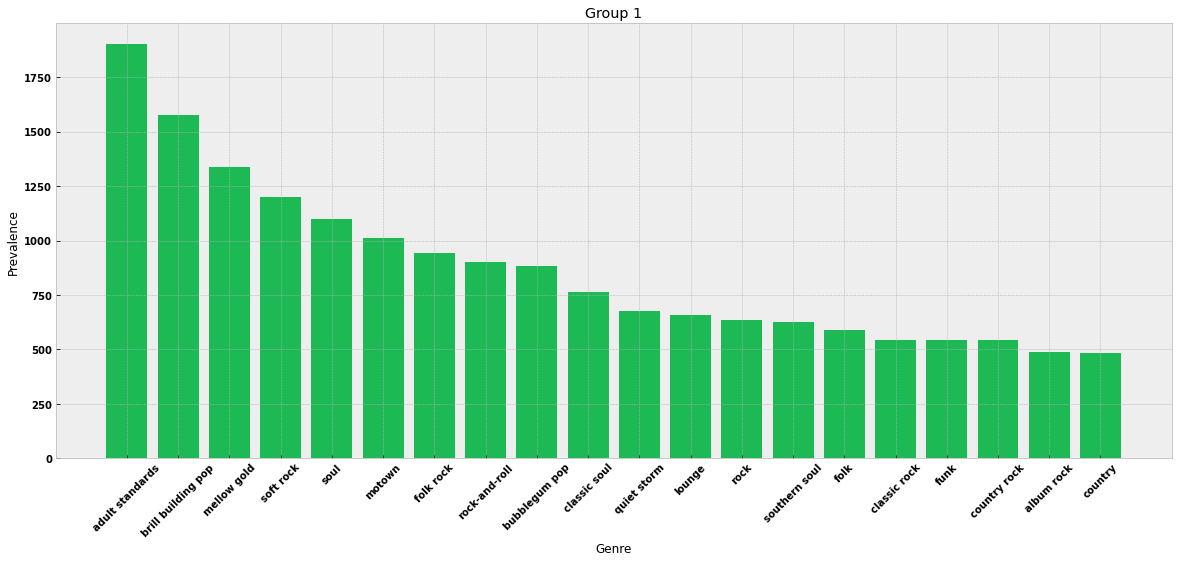

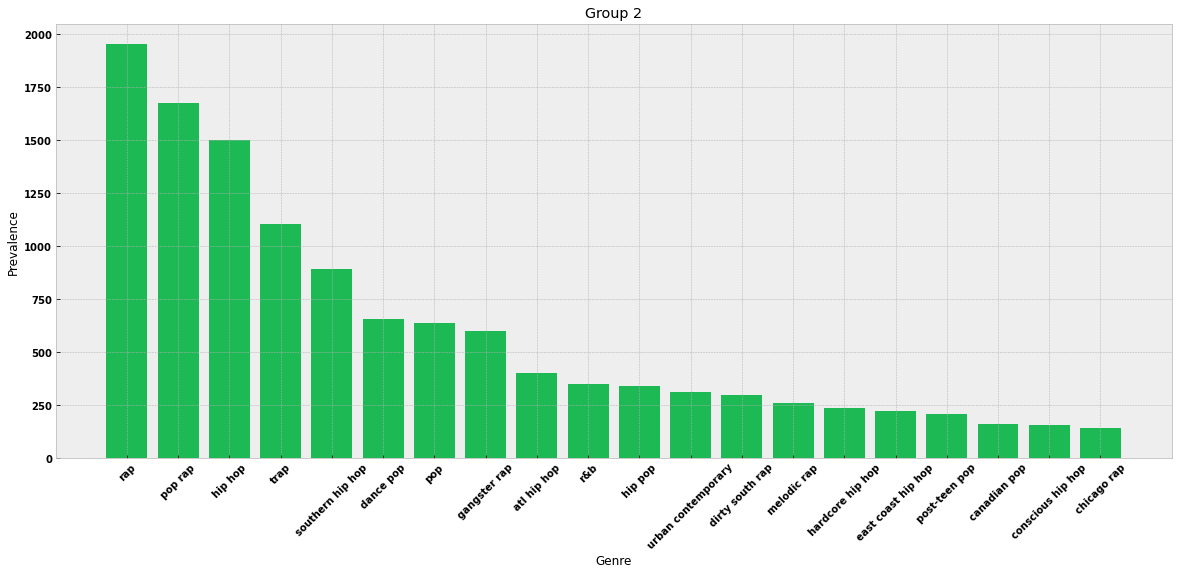

In [78]:
for index, cluster in enumerate(cluster_list):
    parse_genres(cluster, list(set(master)), index, 10)

## Graphing by Group

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


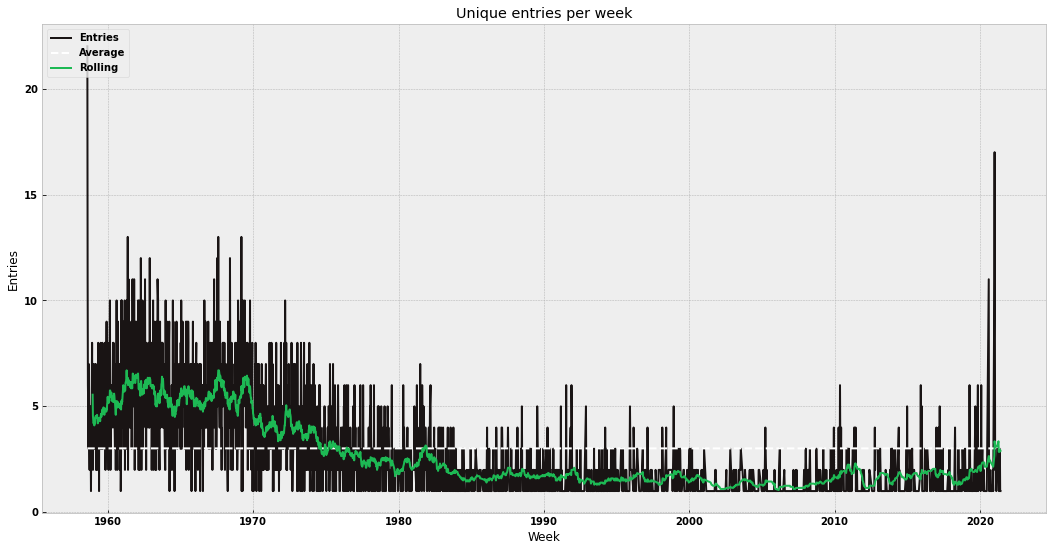

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


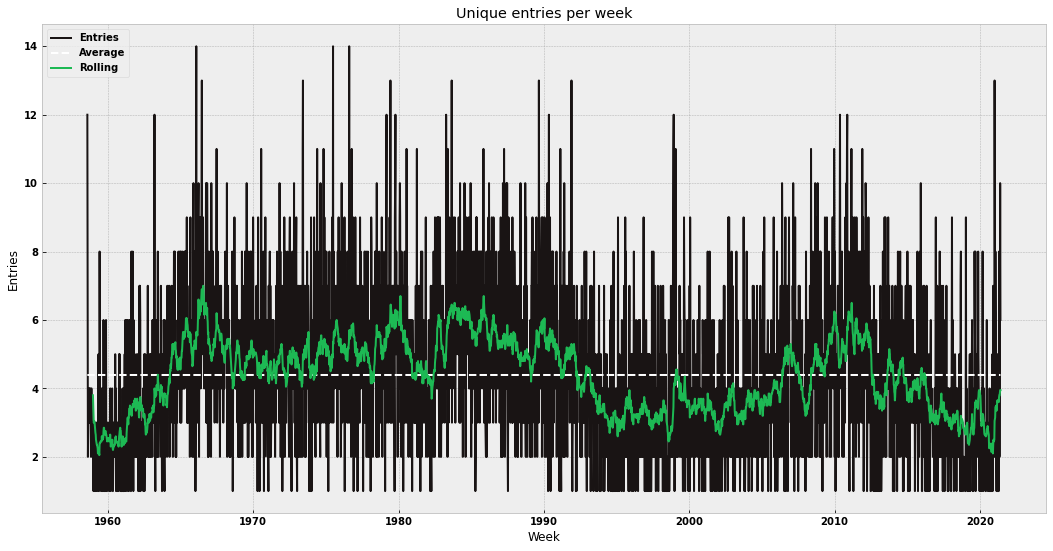

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


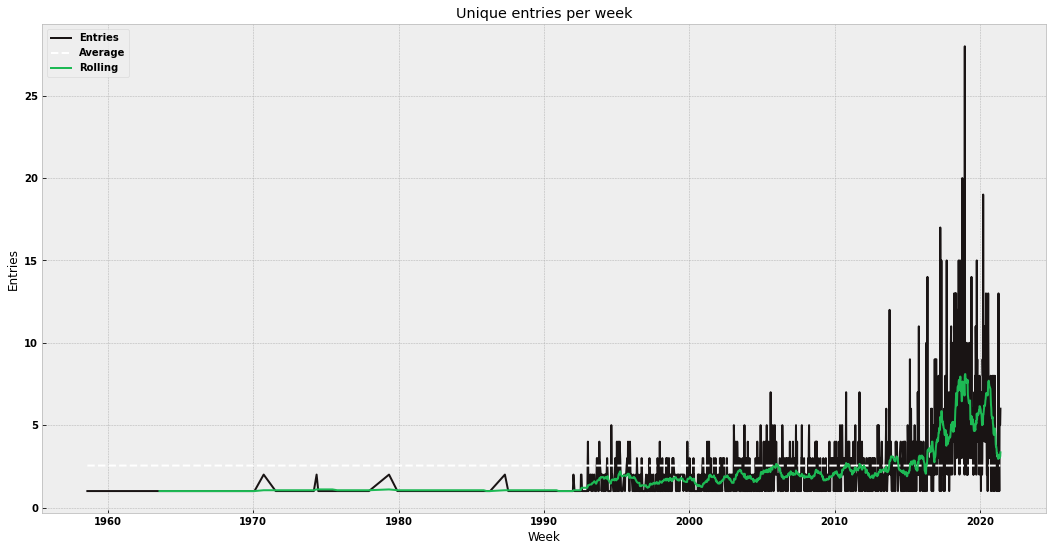

In [137]:
dates_df = new_df
dates_df['WeekID'] = pd.to_datetime(dates_df['WeekID'], errors='coerce')

for i in range(0, 3):
    group_df = dates_df.loc[dates_df['Predictions'] == i].groupby(by='WeekID', as_index=False).count()

    x = np.array(group_df['WeekID'])
    y = np.array(group_df['hot_100_url'])
    avg = np.repeat(group_df['hot_100_url'].mean(), len(x))
    rolling = group_df['hot_100_url'].rolling(window=20).mean()

    plt.plot(x,y, label='Entries', color = spot_black)
    plt.plot(x, avg, '--', label='Average', color = spot_white)
    plt.plot(x, rolling, label="Rolling", color = spot_green)
    plt.title('Unique entries per week')
    plt.xlabel('Week')
    plt.ylabel('Entries')
    plt.legend(loc='upper left')
    plt.savefig('../images/time_series/entries_per_week_ts.eps', format = 'eps')
    plt.show()